In [13]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier



# **Given Discription**

**Data Discription:**

RI: Refractive index

Na: Sodium (weight percent)

Mg: Magnesium

Al: Aluminum

Si: Silicon

K: Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

**Type Of Glass(type)**

1-- Building_windows_float_processed.

2--Building_windows_non_float_processed.
3-- Vehicle_windows_float_processed.

4-- Vehicle_windows_non_float_processed(none in this database).

5-- Containers

6-- Tablewatre

7-- Headlamps


In [18]:
#2.Load Dataset
# Assuming the data starts from the second row and has headers in the first row
df = pd.read_excel("glass.xlsx", header=0, sheet_name="glass")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [20]:
#3.Exploratory Data Analysis (EDA)
print("Shape of dataset:", df.shape)
print("\n Dataset Info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe().T)



Shape of dataset: (214, 10)

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Summary statistics:
       count       mean       std       min        25%       50%        75%  \
RI    214.0   1.518365  0.003037   1.51115   1.516522   1.51768   1.519157   
Na    214.0  13.407850  0.816604  10.73000

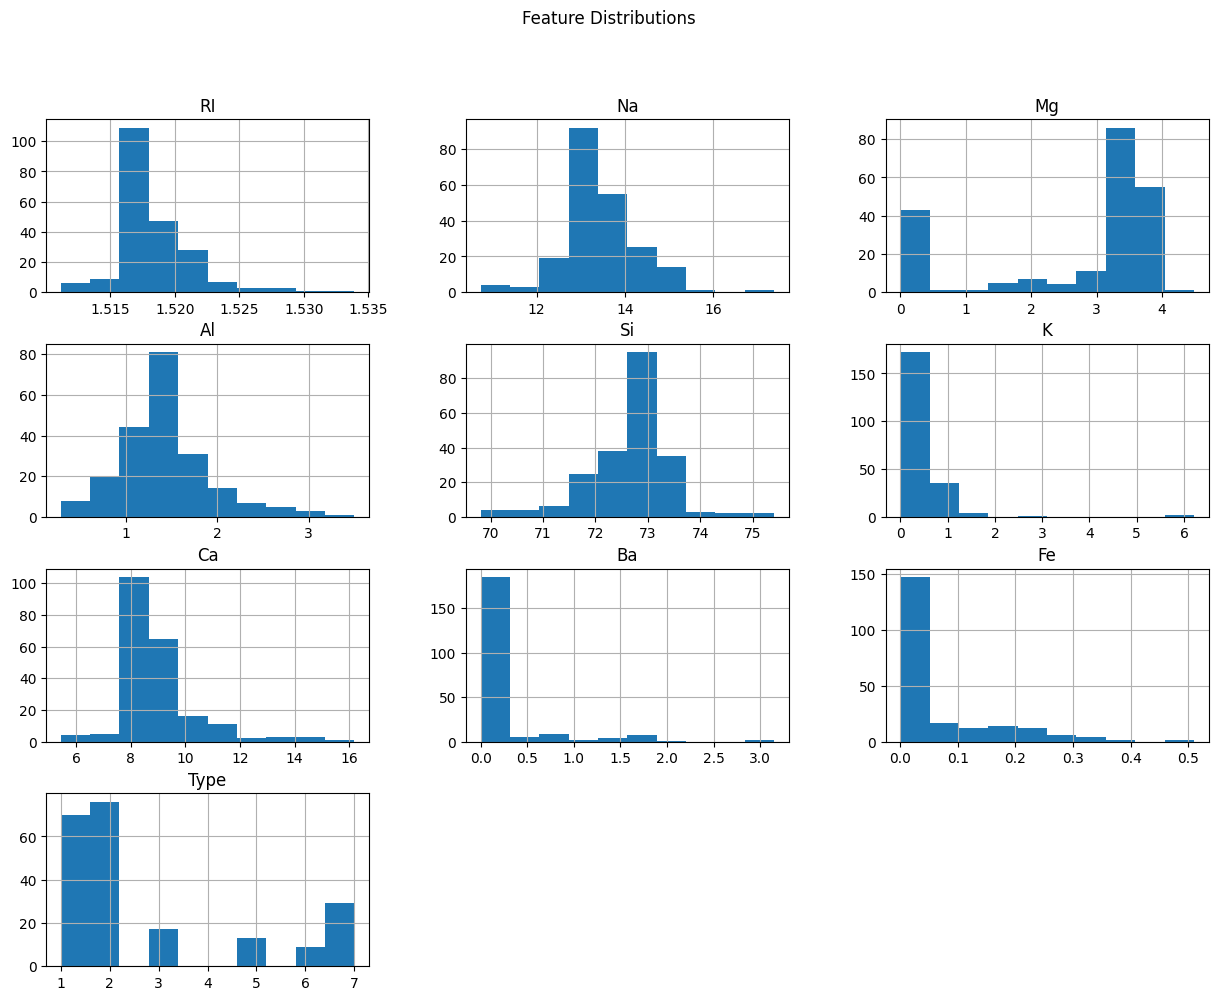

In [24]:
#4.Data Visualization
# Histograms
df.hist(figsize=(15, 11))
plt.suptitle("Feature Distributions")
plt.show()


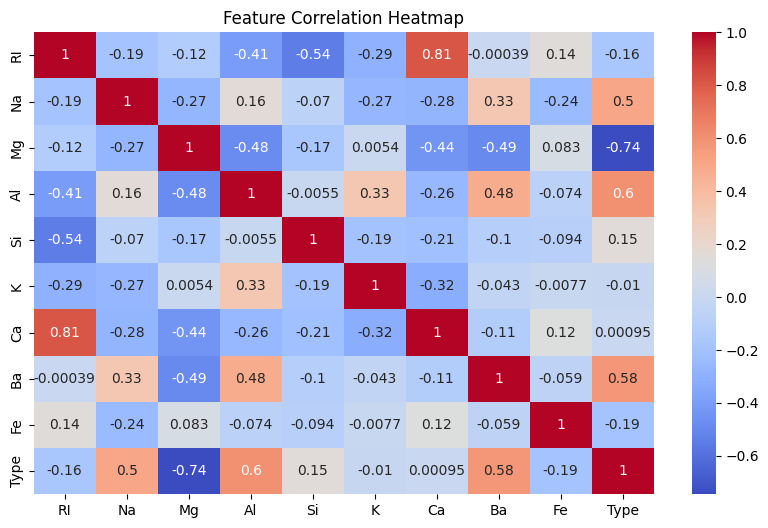

In [25]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


<Figure size 1200x1100 with 0 Axes>

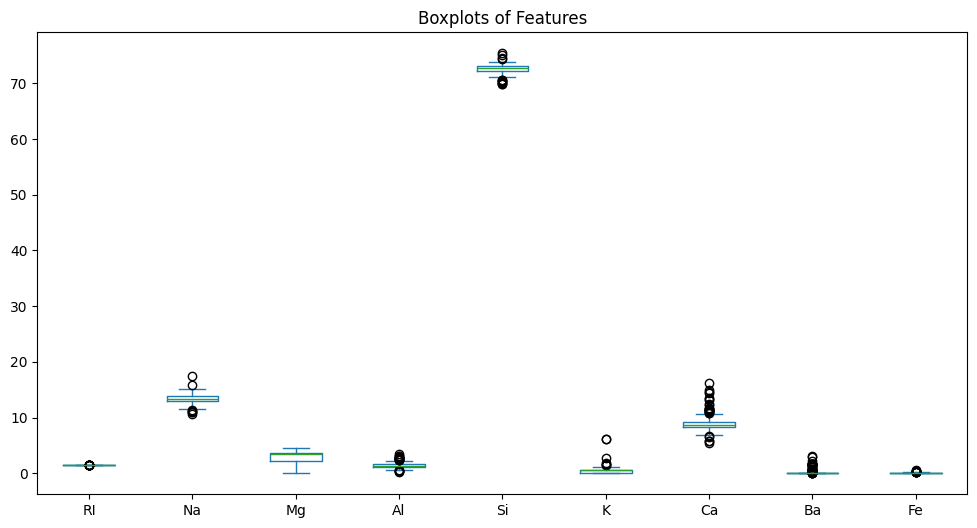

In [27]:

# Boxplots
plt.figure(figsize=(12, 11))
df.drop("Type", axis=1).plot(kind="box", figsize=(12, 6))
plt.title("Boxplots of Features")
plt.show()

In [28]:
#5. Data Preprocessing
# Features and Target
X = df.drop("Type", axis=1)
y = df["Type"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle imbalance using stratified split (so all classes are represented)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)




In [29]:
#6. Random Forest Model Implementation
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))




Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43

Accuracy: 0.813953488372093


In [31]:
#7. Bagging and Boosting
# Bagging
bagging = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_bag = bagging.predict(X_test)
print("\nBagging Accuracy:", accuracy_score(y_test, y_bag))

# AdaBoost
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)
y_ada = adaboost.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_ada))

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_gb))


Bagging Accuracy: 0.7906976744186046
AdaBoost Accuracy: 0.3953488372093023
Gradient Boosting Accuracy: 0.813953488372093


**1. Explain Bagging and Boosting methods. How is it different from each other**

**Bagging**
- Trains multiple models on differnt random subsets of the data.
- Cobines their predecitions.
- Good for reducing variance(overfitting).
- *Random Forest is a Bagging Method*

**Boosting**
- Models are trained one after another.
- Each new model focuses more on correcting mistakes of the previous one.
- It's good for reducing bias(improving accuracy).
- *AdaBoost,Gradient Boosting, XGBoost*.

**2. Explain how to handle imbalance in the data.**

Handle imbalance in the data is used to:
- Stratified sampling in train-test split to keep class proportions balanced in both train and sets.
- class weights used for alogorithms that can handle imbalance.
- Resampling Techniques can try
 Oversampling minority, Undersampling majority.